In [1]:
import seaborn as sns
import pandas as pd
from pathlib import Path

data_path = Path('../data_analysis/datasets/weight_height/weight_height.csv')
df = pd.read_csv(data_path)
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.452378
std,3.847528,32.171523
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,390.200000


<Axes: xlabel='Weight', ylabel='Height'>

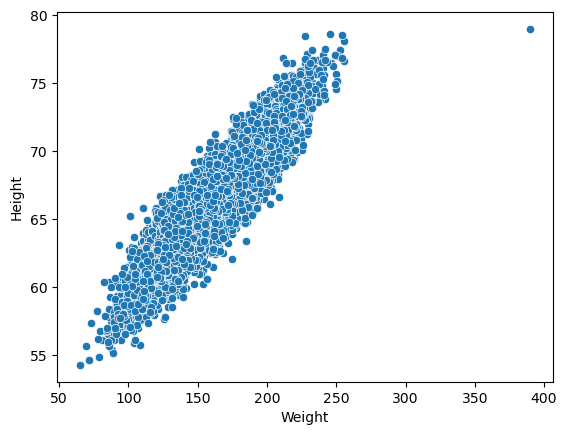

In [2]:

# 이상치 확인을 위한 데이터 시각화

sns.scatterplot(x='Weight', y='Height', data=df)


In [3]:

# query 메서드를 이용한 이상치 제거
df_new = df.query('Weight < 350')
df_new.describe()


,Height,Weight
count,9999.000000,9999.000000
mean,66.366297,161.429501
std,3.845646,32.091686
min,54.263133,64.700127
25%,63.505347,135.817009
50%,66.317899,161.201891
75%,69.172069,187.152394
max,78.621374,255.863326


In [4]:

# quantile 메서드를 이용한 이상치 기준 설정
criteria = df['Weight'].quantile(0.9999) # 데이터 개수의 99.99%(상위 0.01%)에 해당하는 값을 이상치로 지정
criteria


255.876760167255

In [11]:
upper_criteria = df['Weight'].quantile(0.9999)
lower_criteria = df['Weight'].quantile(0.0001)
upper_criteria
lower_criteria

68.982101849662

<Axes: xlabel='Weight', ylabel='Height'>

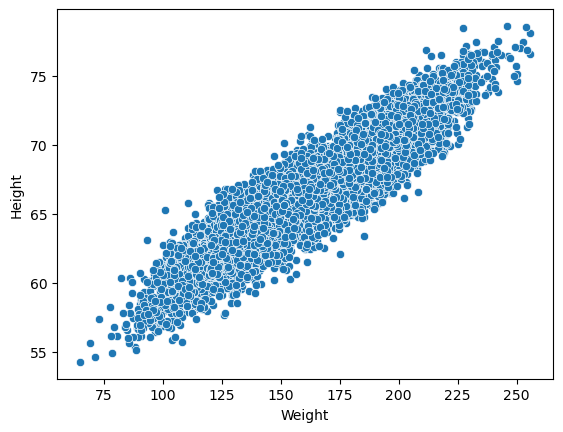

In [5]:

# 이상치 제거 후 시각화
df_new = df[df['Weight'] < criteria]
sns.scatterplot(x='Weight', y='Height', data=df_new)


<Axes: xlabel='Weight', ylabel='Height'>

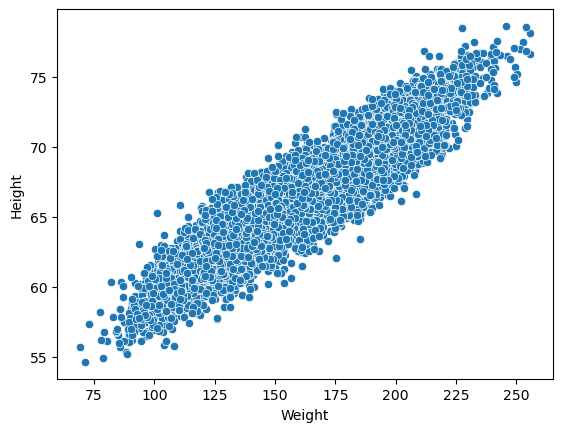

In [13]:
df_new = df[(df['Weight'] < upper_criteria) & (df['Weight'] > lower_criteria)]
sns.scatterplot(x='Weight', y='Height', data=df_new)

In [6]:

# 특정 값 이상의 데이터 인덱스 확인
df[df['Weight'] > 390].index


Index([2014], dtype='int64')

In [7]:

# clip 메서드를 이용한 이상치 제거
df['Weight'] = df['Weight'].clip(50, 300)
df.iloc[2014]

Gender         Male
Height    78.998742
Weight        300.0
Name: 2014, dtype: object